In [10]:
# Natural language text processing
# 16 & 17 Nov 2019
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split


from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

reviews_df= pd.read_csv('C:\\Users\keshav\Desktop\Amazon_Reviews.csv')

reviews_df['Label']=reviews_df['Label'].map({'__label__2 ':1,'__label__1 ':0})

y=reviews_df['Label']

reviews_df.drop(columns='Label',axis=1,inplace=True)

X_train,X_test,y_train,y_test=train_test_split(reviews_df,y,random_state=42,test_size=0.2)


In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stemmer=PorterStemmer()


def preprocessing(review):
    
    final_tokens=' '
    tokens=tokenizer.tokenize(review)
    #print('Tokens:',tokens)
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    #print('Pure Tokens:',pure_tokens)
    lemmas_tokens=[lemmatizer.lemmatize(pure_token) for pure_token in pure_tokens]
    
    final_tokens=final_tokens.join(lemmas_tokens)
    
    return final_tokens


#preprocessing('I was eating my breakfast when you were playing')
X_train['Cleaned_text']=X_train['Review'].apply(preprocessing)
X_train['Cleaned_text']




C:\Users\KESHAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


183    handful track hear far complete though missing...
38     work mac clearly say line work mac o system di...
24     liked album thought would heard song two thoug...
142    pattern detailed sketch although excited purch...
141    contemporary fairytale sure delight book take ...
29     based review bought one glad vcr dvd early chr...
19     size recomended size chart real size much smal...
169    awesume best block ever toy grandson favorite ...
127    one kind book timber frame building husband lo...
118    got fooled know audio cd game thought could us...
56     label memphis tn come reatards fronted course ...
5      absolute masterpiece quite sure actually takin...
122    good gave 5 star little dog much fun riping ap...
113    hour fun 4 6 year old purchased game year ago ...
93     slow dull classical 1980 style movie 2 star 5 ...
139    charisma henry dog daughter 6 gave henry love ...
95     worth time book wriiten horribly would never l...
171    great value set incorpor

In [20]:
vectorizer=TfidfVectorizer(stop_words='english',use_idf=True)

vectorizer.fit(X_train['Cleaned_text'])
X_train_TfIdf=vectorizer.transform(X_train['Cleaned_text'])

vectorizer.get_feature_names()

#stopwords.words('spanish')
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt


clf = MultinomialNB().fit(X_train_TfIdf.toarray(),y_train)

#clf.score(X_train_TfIdf.toarray(),y_train)


#test_review= 'That product was its absolute best and I loved using every feature of it'
X_test['Cleaned_text']=X_test['Review'].apply(preprocessing)

#processed_test_review
X_test_tfIdf=vectorizer.transform(X_test['Cleaned_text'])

y_pred=clf.predict(X_test_tfIdf.toarray())

confusion_matrix(y_test,y_pred)

y_proba_pred=clf.predict_proba(X_test_tfIdf.toarray())[::,1]

fpr,tpr,thresholds=roc_curve(y_test,y_proba_pred)

plt.plot(fpr,tpr)

roc_auc_score(y_test,y_proba_pred)

C:\Users\KESHAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


0.8533333333333333

C:\Users\KESHAV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8533333333333333

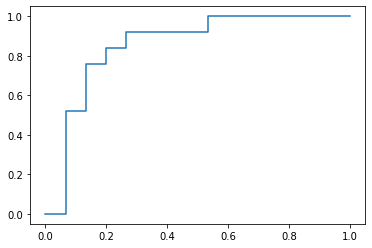

In [15]:
from sklearn.linear_model import  LogisticRegression

logit=LogisticRegression()
logit.fit(X_train_TfIdf,y_train)
y_logistic_pred=logit.predict(X_test_tfIdf)

y_logistic_proba_pred=logit.predict_proba(X_test_tfIdf.toarray())[::,1]

log_fpr,log_tpr,log_thresholds=roc_curve(y_test,y_logistic_proba_pred)

plt.plot(log_fpr,log_tpr)

roc_auc_score(y_test,y_logistic_proba_pred)
